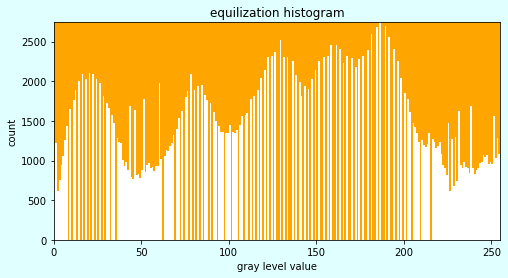

In [2]:
###homework2
#histogram equalization
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

im=cv2.imread("lena.bmp",0)#將檔案讀成灰階檔
## print(type(im))  <class 'numpy.ndarray'>
## image=Image.open("lena.bmp") 
## print(type(image)) <class 'PIL.BmpImagePlugin.BmpImageFile'>

#read data（利用count存取各個灰階直出現的次數）
count = np.zeros(256, np.int)
for i in range(512):
    for j in range(512):
        count[im[i, j]]+=1

#histogram equalization
#先new一個空numpy array來接收equalization後的圖，cv2的image可以直接接收numpy array
#算一下equlized後的s陣列，還有總pixels數numberofpixels

#計算value用相關參數
equalization=np.zeros((512,512),int)
rows, columns= im.shape        
sumPixel = rows* columns
value= np.zeros(256,int)
totalfreq= 0

#計算value(累積的灰階)
for i in range(256):
    totalfreq+=count[i]
    value[i]=totalfreq*255/float(sumPixel) #換算成頻率（分數）

#把處理過後的值換回2維矩陣
for i in range(512):
    for j in range(512):
        equalization[i,j]=int(round(value[im[i,j]])) #round為取四捨五入的感覺
        #value的用法跟count相同，差別只是有沒有處理過

#若要將 NumPy 陣列中儲存的圖片寫入檔案,使用imwrite
cv2.imwrite('equalization_pic.jpg',equalization)

# generate a equiliztion histogram
x= np.linspace(0,255,256,dtype=np.int)
y= count[x]
ax = plt.figure(figsize=(8,4)) #固定大小
ax.set_facecolor('lightcyan') #固定外框顏色(填滿顏色)
plt.axes(facecolor='orange') #內部為黑色背景
plt.hist(equalization.flatten(), bins = x, density=False, color='w')
plt.title('equilization histogram')
plt.xlabel("gray level value")
plt.ylabel("count")
plt.xlim(0, 255)
plt.ylim(0, max(count))
plt.savefig("image_equalization histogram.png")
